In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms
import matplotlib.patches as mpatch
from matplotlib.patches import FancyBboxPatch
import requests
import os
import json
import cv2
import time

os.chdir("nhl/")

import nhl
from nhl.team import Team
from nhl.game import Game

os.chdir("..")

base_url='https://statsapi.web.nhl.com/api/v1'

plt.rcParams['figure.figsize'] = 10,7

# TODO: ADD WIN/LOSS COLUMN

In [2]:
game_ids = nhl.api.getGameIDs(10, include_future=False)
game = Game(game_ids[-1])
game.makeDataFrames()

In [110]:
game.shot_data

,event,secondary_type,player_one,player_one_role,player_two,player_two_role,coords,period,period_time_remaining,player_one_team,player_two_team,home_team,description,home_goals,away_goals,game_winning,empty_net,player_one_id,player_two_id
9,shot,Snap Shot,Martin Marincin,Shooter,Thatcher Demko,Goalie,"[3.0, 2.0]",1,16:30,TOR,VAN,TOR,Martin Marincin Snap Shot saved by Thatcher Demko,1,0,None,None,8475716,8477967.0
13,shot,Wrist Shot,Travis Dermott,Shooter,Thatcher Demko,Goalie,"[-31.0, -18.0]",1,15:15,TOR,VAN,TOR,Travis Dermott Wrist Shot saved by Thatcher Demko,1,0,None,None,8478408,8477967.0
33,shot,Wrist Shot,Jake Virtanen,Shooter,Frederik Andersen,Goalie,"[64.0, 39.0]",1,11:45,VAN,TOR,TOR,Jake Virtanen Wrist Shot saved by Frederik And...,2,1,None,None,8477937,8475883.0
41,shot,Wrist Shot,Denis Malgin,Shooter,Thatcher Demko,Goalie,"[-52.0, -20.0]",1,10:02,TOR,VAN,TOR,Denis Malgin Wrist Shot saved by Thatcher Demko,2,1,None,None,8478843,8477967.0
43,shot,Wrist Shot,Mitchell Marner,Shooter,Thatcher Demko,Goalie,"[-40.0, 29.0]",1,09:25,TOR,VAN,TOR,Mitchell Marner Wrist Shot saved by Thatcher D...,2,1,None,None,8478483,8477967.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18,goal,Snap Shot,Tyler Motte,Scorer,Frederik Andersen,Goalie,"[75.0, 6.0]",1,14:32,VAN,TOR,TOR,"Tyler Motte (4) Snap Shot, assists: Brandon Su...",1,1,False,False,8477353,8475883.0
24,goal,Wrist Shot,Auston Matthews,Scorer,Thatcher Demko,Goalie,"[-79.0, -24.0]",1,13:35,TOR,VAN,TOR,"Auston Matthews (45) Wrist Shot, assists: Trav...",2,1,False,False,8479318,8477967.0
49,goal,Snap Shot,Tanner Pearson,Scorer,Frederik Andersen,Goalie,"[84.0, -11.0]",1,08:59,VAN,TOR,TOR,"Tanner Pearson (19) Snap Shot, assists: Bo Hor...",2,2,False,False,8476871,8475883.0
170,goal,Wrist Shot,Martin Marincin,Scorer,Thatcher Demko,Goalie,"[-67.0, 0.0]",3,19:42,TOR,VAN,TOR,"Martin Marincin (1) Wrist Shot, assists: John ...",3,2,True,False,8475716,8477967.0


In [5]:
# _penalties = []
# _shots = []
# _turnovers = []
# _hits = []

# for g_id in game_ids:
#     game = Game(g_id)
#     game.makeDataFrames()
#     _penalties.append(game.penalty_data)
#     _shots.append(game.shot_data)
#     _turnovers.append(game.turnover_data)
#     _hits.append(game.hit_data)

In [52]:
game = Game(game_ids[0])

In [58]:
game.live_data['plays']['allPlays'][11]

{'players': [{'player': {'id': 8478483,
    'fullName': 'Mitchell Marner',
    'link': '/api/v1/people/8478483'},
   'playerType': 'PlayerID'}],
 'result': {'event': 'Giveaway',
  'eventCode': 'TOR155',
  'eventTypeId': 'GIVEAWAY',
  'description': 'Giveaway by Mitchell Marner'},
 'about': {'eventIdx': 11,
  'eventId': 155,
  'period': 1,
  'periodType': 'REGULAR',
  'ordinalNum': '1st',
  'periodTime': '01:04',
  'periodTimeRemaining': '18:56',
  'dateTime': '2019-10-02T23:17:56Z',
  'goals': {'away': 1, 'home': 0}},
 'coordinates': {'x': -36.0, 'y': -31.0},
 'team': {'id': 10,
  'name': 'Toronto Maple Leafs',
  'link': '/api/v1/teams/10',
  'triCode': 'TOR'}}

In [6]:
penalties = pd.concat(_penalties)
shots = pd.concat(_shots)
turnovers = pd.concat(_turnovers)
hits = pd.concat(_hits)

## Where do the leaf's take penalties?

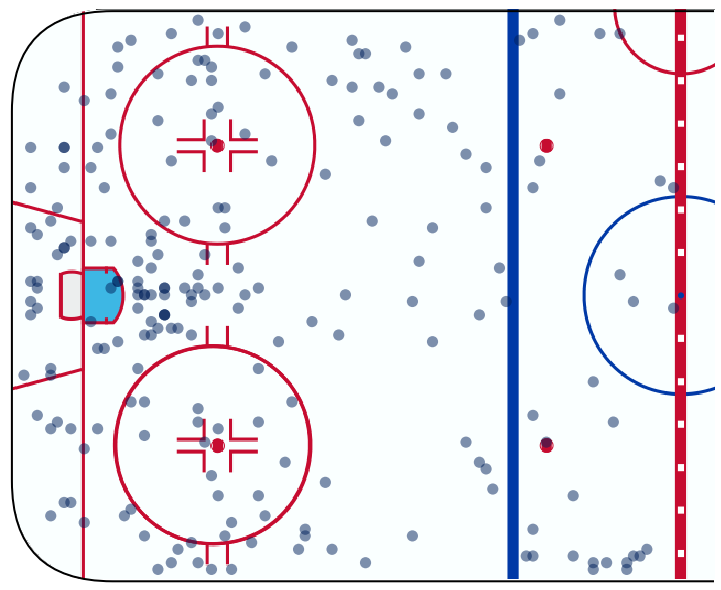

In [20]:
def loadRink():
    # load icerink image
    icerink = cv2.imread('images/icerink.png', cv2.IMREAD_UNCHANGED)
    icerink = cv2.cvtColor(icerink, cv2.COLOR_BGRA2RGBA)

    # --------------------------------------------------------------- #
    # annoying matplotlib stuff to properly plot the rink
    plt.rcParams['figure.figsize'] = 12, 8
    fig = plt.figure(frameon=False)
    ax = plt.Axes(fig, [0, 0, 1, 1])
    ax.set_axis_off()
    fig.add_axes(ax)

    # for centering the origin at center ice
    extent = [-100, 100, -42.5, 42.5]
    # drawing black line around the edge
    bb = mtransforms.Bbox([[-99.7, -42.675], [99.65, 42.25]])
    p_fancy = FancyBboxPatch((bb.xmin, bb.ymin),
                             abs(bb.width), abs(bb.height),
                             boxstyle="round, pad=0.1, rounding_size=15",
                             fill=False, ec='black', lw=2)
    ax.add_patch(p_fancy)
    ax.set_xlim(-100.5, 5)
    ax.set_ylim(-43, 43)
    # --------------------------------------------------------------- #

    # put the rink on the plot
    plt.imshow(icerink, extent=extent)
    
    return ax

ax = loadRink()
# filter to our penalties
leaf_penalties = penalties[penalties.player_one_team == 'TOR']
pcoords = np.array([[*coord] for coord in leaf_penalties.coords.values])
pcoords[pcoords[:, 0] > 0] *= -1

# plot shot data
plt.scatter(pcoords[:, 0], pcoords[:, 1], c='#00205B', s=125, alpha=0.5, edgecolor='none')
plt.show()

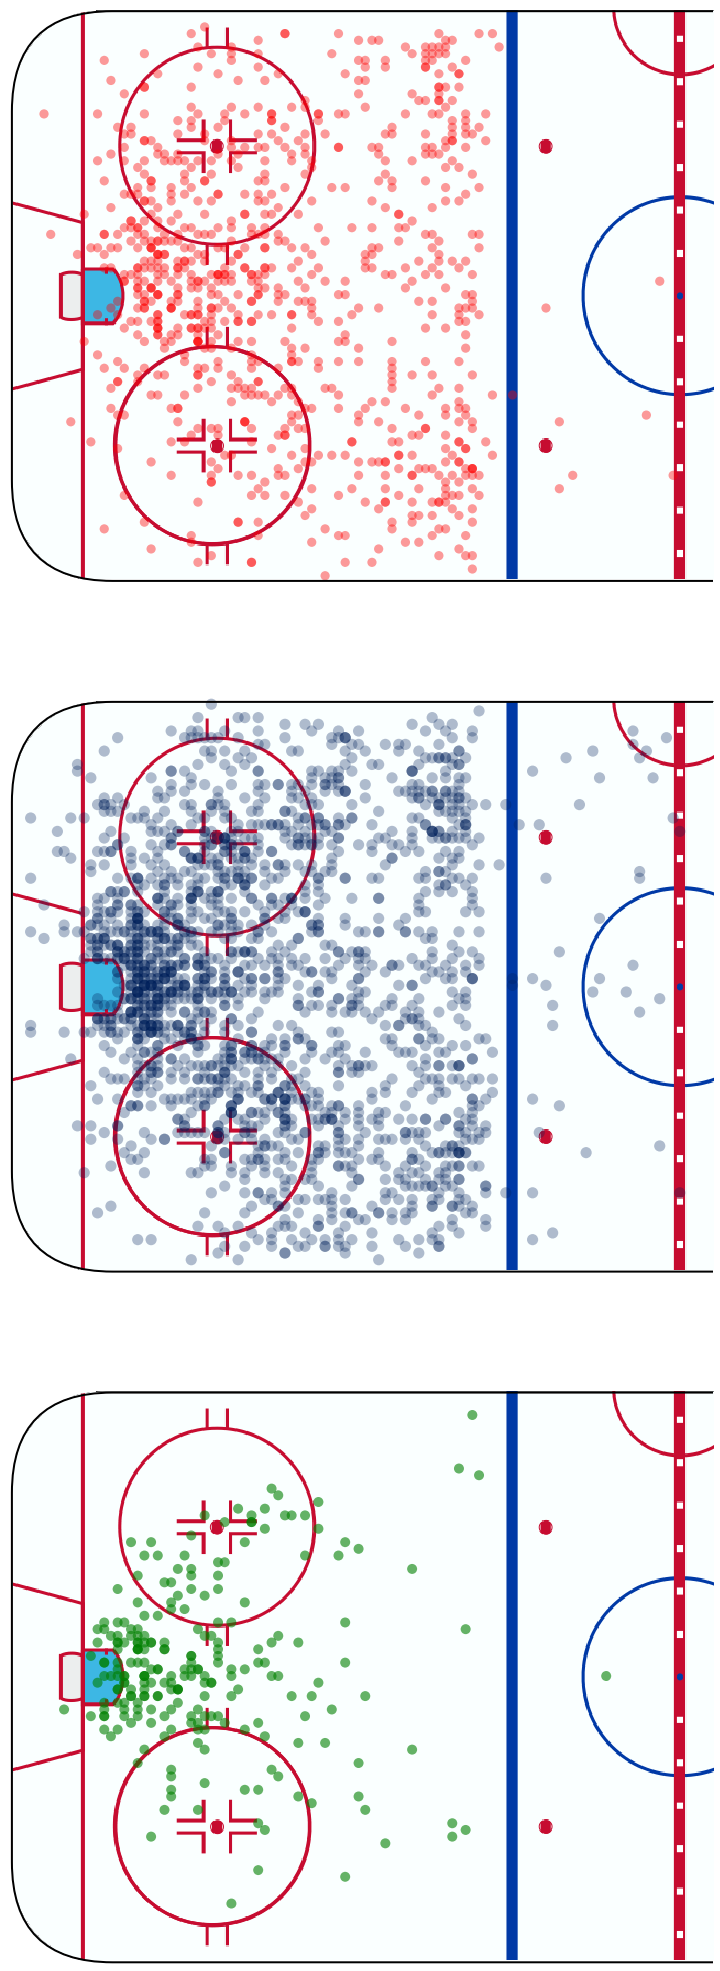

In [42]:
# load icerink image
icerink = cv2.imread('images/icerink.png', cv2.IMREAD_UNCHANGED)
icerink = cv2.cvtColor(icerink, cv2.COLOR_BGRA2RGBA)

# --------------------------------------------------------------- #
# annoying matplotlib stuff to properly plot the rink
plt.rcParams['figure.figsize'] = 16, 36
fig, ax = plt.subplots(3, 1, frameon=False)
ax[0].set_axis_off()
ax[1].set_axis_off()
ax[2].set_axis_off()

# for centering the origin at center ice
extent = [-100, 100, -42.5, 42.5]
# drawing black line around the edge
bb = mtransforms.Bbox([[-99.7, -42.675], [99.65, 42.25]])
p_fancy = FancyBboxPatch((bb.xmin, bb.ymin),
                         abs(bb.width), abs(bb.height),
                         boxstyle="round, pad=0.1, rounding_size=15",
                         fill=False, ec='black', lw=2)

bb2 = mtransforms.Bbox([[-99.7, -42.675], [99.65, 42.25]])
p_fancy2 = FancyBboxPatch((bb2.xmin, bb2.ymin),
                         abs(bb2.width), abs(bb2.height),
                         boxstyle="round, pad=0.1, rounding_size=15",
                         fill=False, ec='black', lw=2)

bb3 = mtransforms.Bbox([[-99.7, -42.675], [99.65, 42.25]])
p_fancy3 = FancyBboxPatch((bb3.xmin, bb3.ymin),
                         abs(bb3.width), abs(bb3.height),
                         boxstyle="round, pad=0.1, rounding_size=15",
                         fill=False, ec='black', lw=2)
ax[0].add_patch(p_fancy)
ax[1].add_patch(p_fancy2)
ax[2].add_patch(p_fancy3)

ax[0].set_xlim(-100.5, 5)
ax[0].set_ylim(-43, 43)

ax[1].set_xlim(-100.5, 5)
ax[1].set_ylim(-43, 43)

ax[2].set_xlim(-100.5, 5)
ax[2].set_ylim(-43, 43)
# --------------------------------------------------------------- #

# put the rink on the plot
ax[0].imshow(icerink, extent=extent)
ax[1].imshow(icerink, extent=extent)
ax[2].imshow(icerink, extent=extent)



mlshots = shots[shots.player_one_team == 'TOR']

missed = mlshots[mlshots.event == 'missed_shot']
goal = mlshots[mlshots.event == 'goal']
sog = mlshots[mlshots.event == 'shot']

mcoords = np.array([[*coord] for coord in missed.coords.values])
gcoords = np.array([[*coord] for coord in goal.coords.values])
scoords = np.array([[*coord] for coord in sog.coords.values])

mcoords[mcoords[:, 0] > 0] *= -1
gcoords[gcoords[:, 0] > 0] *= -1
scoords[scoords[:, 0] > 0] *= -1

ax[0].scatter(mcoords[:, 0], mcoords[:, 1], c='red', s=85, alpha=0.4, edgecolor='none')
ax[1].scatter(scoords[:, 0], scoords[:, 1], c='#00205B', s=125, alpha=0.3, edgecolor='none')
ax[2].scatter(gcoords[:, 0], gcoords[:, 1], c='green', s=100, alpha=0.6, edgecolor='none')

plt.show()

In [23]:
data['plays']['scoringPlays']

[9, 22, 30, 60, 214, 305]

In [24]:
weird_events = {'Unknown', 'Period Start', 'Period End', 'Game End', 'Game Scheduled', 
                'Period Ready', 'Period Official', 'Early Intermission Start', 
                'Early Intermission End', 'Game Official', 'Shootout Complete'}

other_events = {'Stoppage', 'Sub', 'Fight', 'Emergency Goaltender', 'Official Challenge'}

game_events = {'Faceoff', 'Hit', 'Giveaway', 'Goal', 'Shot', 'Missed Shot', 'Penalty',
               'Takeaway', 'Blocked Shot'}

plays = data['plays']['allPlays']

cols = ['event', 'secondary_type', 'player_one', 'player_one_role', 'player_two', 'player_two_role', 
        'coords', 'period', 'period_time_remaining', 'player_one_team', 'player_two_team', 'description', 
        'score', 'game_winning','empty_net', 'player_one_id', 'player_two_id']

plays[22]

{'players': [{'player': {'id': 8477353,
    'fullName': 'Tyler Motte',
    'link': '/api/v1/people/8477353'},
   'playerType': 'Scorer',
   'seasonTotal': 4},
  {'player': {'id': 8474091,
    'fullName': 'Brandon Sutter',
    'link': '/api/v1/people/8474091'},
   'playerType': 'Assist',
   'seasonTotal': 9},
  {'player': {'id': 8474291,
    'fullName': 'Jay Beagle',
    'link': '/api/v1/people/8474291'},
   'playerType': 'Assist',
   'seasonTotal': 6},
  {'player': {'id': 8475883,
    'fullName': 'Frederik Andersen',
    'link': '/api/v1/people/8475883'},
   'playerType': 'Goalie'}],
 'result': {'event': 'Goal',
  'eventCode': 'TOR18',
  'eventTypeId': 'GOAL',
  'description': 'Tyler Motte (4) Snap Shot, assists: Brandon Sutter (9), Jay Beagle (6)',
  'secondaryType': 'Snap Shot',
  'strength': {'code': 'EVEN', 'name': 'Even'},
  'gameWinningGoal': False,
  'emptyNet': False},
 'about': {'eventIdx': 22,
  'eventId': 18,
  'period': 1,
  'periodType': 'REGULAR',
  'ordinalNum': '1st',
 

In [ ]:
_data = []
for play in plays:
    if play['result']['event'] in weird_events:
        continue
    elif play['result']['event'] in other_events:
        # for now just ignore these
        continue
    # just so we do not have any accidental carry over
    event, secondary_type, player_one, player_two = [None]*4
    player_one_role, player_two_role, coords, period = [None]*4
    period_time_remaining, player_one_team, player_two_team = [None]*3
    description, score, game_winning, empty_net = [None]*4
    player_one_id, player_two_id = None, None
    
    # now collect and organize the data......
    event = play['result']['eventTypeId'].lower()
    description = play['result']['description']
    period = play['about']['period']
    period_time_remaining = play['about']['periodTimeRemaining']
    score = play['about']['goals']
    
    try:
        coords = np.array(list(play['coordinates'].values()))
    except KeyError:
        coords = np.nan
    try:
        empty_net = play['result']['emptyNet']
        game_winning = play['result']['gameWinningGoal']
    except KeyError:
        empty_net = None
        game_winning = None
    
    try:
        strength = play['result']['strength']['name'].lower()
    except KeyError:
        strength = None
    
    try:
        secondary_type = play['result']['secondaryType']
    except KeyError:
        secondary_type = None
        
    try:
        player_one = play['players'][0]['fullName']
        player_one_id = play['players'][0]['id']
        player_one_role = play['players'][0]['playerType']
    
        if play['players'][-1]['fullName'] == player_one:
            player_two = None
            player_two_id = None
            player_two_role = None
        else:
            _temp = play['players'][-1]
            player_two = _temp['fullName']
            player_two_id = _temp['id']
            player_two_role = _temp['playerType']
    
    except KeyError:
        player_one, player_one_id, player_one_role = [None]*3
        player_two, player_two_id, player_two_role = [None]*3
    
    player_one_team = play['team']['triCode']
    if self.home == player_one_team:
        player_two_team = self.away
    else:
        player_two_team = self.home
        
    vals = [event, secondary_type, player_one, player_one_role, player_two, player_two_role]
    vals += [coords, period, period_time_remaining, player_one_team, player_two_team, description]
    vals += [score, game_winning, empty_net, player_one_id, player_two_id]
    
    _data.append(vals)

# Understanding the Data

In [14]:
# setup/initialize data stuff
# get team data
team_ids = nhl.api.getTeamIDs()

team_data = requests.get(base_url + f'/teams?teamID={id_query}&expand=team.stats')
team_data = team_data.json()

<Response [200]>

In [23]:
tor = team_data['teams'][9]
tor.keys()

dict_keys(['id', 'name', 'link', 'venue', 'abbreviation', 'teamName', 'locationName', 'firstYearOfPlay', 'division', 'conference', 'franchise', 'teamStats', 'shortName', 'officialSiteUrl', 'franchiseId', 'active'])

In [36]:
a = tor['teamStats'][0]['splits'][0]   # raw data
b = tor['teamStats'][0]['splits'][1]   # league rankings

In [37]:
tor = requests.get(base_url + f'/teams?teamID=10&expand=team.stats&stats=gameLog')
tor = tor.json()
tor = tor['teams']


In [51]:
tor[9]['teamStats'][0]['splits'][0]

{'stat': {'gamesPlayed': 66,
  'wins': 35,
  'losses': 23,
  'ot': 8,
  'pts': 78,
  'ptPctg': '59.1',
  'goalsPerGame': 3.515,
  'goalsAgainstPerGame': 3.242,
  'evGGARatio': 1.0397,
  'powerPlayPercentage': '23.8',
  'powerPlayGoals': 43.0,
  'powerPlayGoalsAgainst': 42.0,
  'powerPlayOpportunities': 181.0,
  'penaltyKillPercentage': '76.9',
  'shotsPerGame': 32.9091,
  'shotsAllowed': 31.8788,
  'winScoreFirst': 0.767,
  'winOppScoreFirst': 0.333,
  'winLeadFirstPer': 0.8,
  'winLeadSecondPer': 0.857,
  'winOutshootOpp': 0.613,
  'winOutshotByOpp': 0.452,
  'faceOffsTaken': 3716.0,
  'faceOffsWon': 1959.0,
  'faceOffsLost': 1757.0,
  'faceOffWinPercentage': '52.7',
  'shootingPctg': 10.7,
  'savePctg': 0.898},
 'team': {'id': 10, 'name': 'Toronto Maple Leafs', 'link': '/api/v1/teams/10'}}

In [52]:
box = nhl.api.getBoxScore(game_ids[-1])

In [56]:
box[0]['teamStats']

{'teamSkaterStats': {'goals': 4,
  'pim': 4,
  'shots': 30,
  'powerPlayPercentage': '0.0',
  'powerPlayGoals': 0.0,
  'powerPlayOpportunities': 4.0,
  'faceOffWinPercentage': '54.1',
  'blocked': 20,
  'takeaways': 7,
  'giveaways': 17,
  'hits': 10}}

In [57]:
test = requests.get(base_url + f'/game/{game_ids[0]},{game_ids[1]}/boxscore')

In [59]:
test.json()

{'messageNumber': 11,
 'message': 'Invalid Request with value: 2019020001,2019020015'}

## Time Series

In [82]:
# setup
teams = np.random.choice(team_data, 5, replace=False)
names = [t['abbreviation'] for t in teams]
names

['TOR', 'NYI', 'WSH', 'DAL', 'MTL']

In [99]:
stats = [t['teamStats'][0]['splits'][0]['stat'] for t in teams]
df = pd.DataFrame(stats, index=['TOR', 'NYI', 'WSH', 'DAL', 'MTL'])
df

,gamesPlayed,wins,losses,ot,pts,ptPctg,goalsPerGame,goalsAgainstPerGame,evGGARatio,powerPlayPercentage,...,winLeadFirstPer,winLeadSecondPer,winOutshootOpp,winOutshotByOpp,faceOffsTaken,faceOffsWon,faceOffsLost,faceOffWinPercentage,shootingPctg,savePctg
TOR,66,35,23,8,78,59.1,3.515,3.242,1.0397,23.8,...,0.800,0.857,0.613,0.452,3716.0,1959.0,1757.0,52.7,10.7,0.898
NYI,64,35,21,8,78,60.9,2.781,2.703,0.9752,17.5,...,0.714,0.885,0.520,0.579,3389.0,1681.0,1708.0,49.6,9.5,0.914
WSH,65,40,19,6,86,66.2,3.415,3.031,1.0896,20.3,...,0.905,0.839,0.641,0.632,3886.0,1881.0,2005.0,48.4,10.7,0.900
DAL,65,37,21,7,81,62.3,2.692,2.538,1.0094,21.7,...,0.850,0.885,0.667,0.485,3753.0,1939.0,1814.0,51.7,8.9,0.920
MTL,67,30,28,9,69,51.5,2.970,3.075,1.0606,18.5,...,0.586,0.655,0.475,0.417,4029.0,2050.0,1979.0,50.9,8.7,0.902


### Team Level - Wins, Goals For, PP, Points, etc.

### Individual Level - Goals, Assists, Hits, Blocked Shots, etc.

## Game Data (coordinates)

### Basic Plots

### Aggregated (i.e. averages or whatever)

# Methodology etc.

In [4]:
# setup and such

## Forecasting (time-series)

In [5]:
# setup and such

## Dimensionality Reduction

In [6]:
# setup and such

### PCA

### t-SNE and UMAP